In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
train = train.fillna(0)

In [3]:
X = train.loc[:, ["Sex","Age"]].values
Y = train.loc[:, ["Survived"]].values

In [4]:
X =np.where(X=='male', 0, X) 
X = np.where(X=='female', 1, X)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [6]:
x_train_svc, x_test_svc, y_train_svc, y_test_svc = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

In [7]:
clf = SVC(gamma='auto')
clf.fit(x_train_svc, np.ravel(y_train_svc.astype('int')))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

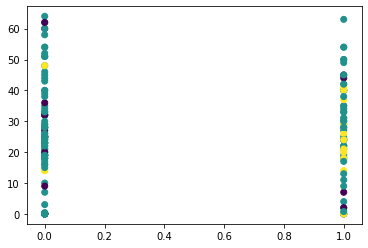

In [8]:
y_predict_svc = clf.predict(x_test_svc)
y_test_svc = y_test_svc.reshape(len(y_test_svc))
plt.scatter(x_test_svc[:,0], x_test_svc[:,1], c=y_predict_svc-y_test_svc)